This program uses the **Dummy Regressor**. It is a comparison ML algorithm that is only used as a benchmark, as it uses simple rules for prediction that are unlikely to add any real forecasting value

Steps

- Import and preprocess the historical data, which must contain a sufficient number of values to ensure a decent backtest and evaluation
- Perform a train-test split, which splits the data into two parts
    - The first part is for training the algorithm
    - The second part is for testing the algorithm's performance on data it has never seen before
- Fit (train) and predict (test) the data using the algorithm
- Run a performance evaluation algorithm to understand the model's performance in the past

In [1]:
# Import Relevant Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from master_function import data_preprocessing, mass_import 
from master_function import plot_train_test_values
from master_function import calculate_accuracy, model_bias
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

Here, we import and transform the close price data.

In [2]:
data = np.diff(mass_import(0,'M15')[:,3])

# number of lags = number of predictors
num_lags = 500
# train_test_split = percentage split of data
train_test_split = 0.8

In [3]:
def data_preprocessing(data, num_lags, train_test_split):

    # Prepare the data for training
    x = []
    y = []

    for i in range(len(data) - num_lags):

        x.append(data[i:i + num_lags])
        y.append(data[i + num_lags])

    # Convert the data to numpy arrays
    x = np.array(x)
    y = np.array(y)

    # Split the data into training and testing sets
    split_index = int(train_test_split * len(x))
    x_train = x[:split_index]
    y_train = y[:split_index]

    x_test = x[split_index:]
    y_test = y[split_index:]

    return x_train, y_train, x_test, y_test

The next step is to train the data using the chosen algorithm

In [ ]:
# Creating the training and test sets
x_train , y_train, x_test, y_test = data_preprocessing(data, num_lags, train_test_split)

# Fitting the model
model = DummyRegressor(strategy = 'mean')
# mean -> always predict the mean of the training set
# median -> always predict the median of the training set
# quantile -> always predict a specified quantile of the training set, provided with the quantile parameter
# constant -> always predict a constant value that is provided by the user

model.fit(x_train, y_train)

DummyRegressor()

Choosing the mean parameter means that all predictions made will simply be the mean of the training set, which is why the dummy regression is not a serious ML model.

In [5]:
# Predicting in-sampe
y_predicted_train = np.reshape(model.predict(x_train), (-1,1))
y_predicted = np.reshape(model.predict(x_test), (-1,1))

# Comparing the mean of y_train to an arbitrary value in y_predicted
y_train.mean() == y_predicted[123]

array([ True])

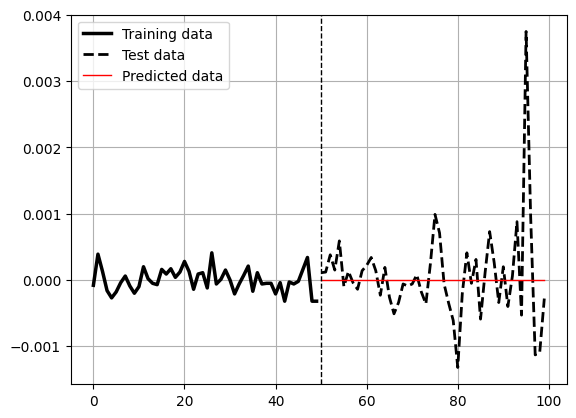

In [ ]:
# Plot results
plot_train_test_values(100,50,y_train, y_test, y_predicted)